# Streaming Music Data (from Spotify and YouTube)

This dataset has a *lot* more rows and columns of data than the previous examples, so we'll need to carefully explore the data first, then determine which parts of the data are the most important or interesting, and then we'll know which kinds of data visualizations we should use.

In [1]:
# load libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import squarify

In [2]:
# import data
filePath = os.path.join('.','data','music.csv')
df = pd.read_csv(filePath)

# look at top three rows of df
# if we wanted to look at the bottom 3 rows, we would use df.tail(3)
df.head(3)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [3]:
# Standard data exploration techniques

# Size and shape of data
print('Size: ', df.size, '\tShape: ', df.shape, '\n')

# Dataframe info
df.info()

Size:  580104 	Shape:  (20718, 28) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tem

##### What do you notice about how df.info() handles communicating null/non-null data compared to df.isnull(any) and df.isnull(sum)?
##### Which do you think is more useful for you? Why?

In [4]:
# Deeper data exploration techniques

# Describe the contents of the dataframe
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### What insights can we get from creating visuals?
#### Keep in mind to check for columns with null values. How would you handle those? Consider this on a case-by-case basis.

##### 1. Find the Top 10 artists by Likes (sum the Likes column and [group by](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) Artist)
Keep in mind the Likes column has null values.

Other references that may be helful include:
* [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) 
* [nlargest/nsmallest](https://datascientyst.com/get-top-10-highest-lowest-values-pandas/)

In [5]:
# how many null values do you need to handle?
# how does this influence how you'll proceed?

print('Likes column NaN/Nulls: ', df['Likes'].isna().sum())
print('Total df records: ', len(df.index))
print('Percent NaN/Null: ', round((df['Likes'].isna().sum()/len(df.index))*100, 2), '%')

Likes column NaN/Nulls:  541
Total df records:  20718
Percent NaN/Null:  2.61 %


In [6]:
# handle nulls
# you can choose to create a df copy or to edit the df directly
# if you want to play with different ways of handling nulls, create a copy

# here are examples of how to use each method we went over: drop and fillna (mean, median, mode)

# drop
df_drop = df.copy()
df_drop.dropna(subset = ['Likes'], inplace=True)
print('DROP METHOD')
print('Likes column NaN/Nulls after drop: ', df_drop['Likes'].isna().sum())
print('Total df records original: ', len(df.index))
print('Total df records after drop: ', len(df_drop.index))

# average
df_avg = df.copy()
df_avg['Likes'].fillna((df_avg['Likes'].mean()), inplace=True)
print('\nFILLNA AVERAGE')
print('Likes column NaN/Nulls after fillna average: ', df_avg['Likes'].isna().sum())
print('Total df records original: ', len(df.index))
print('Total df records after fillna average: ', len(df_avg.index))

# median
df_med = df.copy()
df_med['Likes'].fillna((df_med['Likes'].median()), inplace=True)
print('\nFILLNA MEDIAN')
print('Likes column NaN/Nulls after fillna median: ', df_med['Likes'].isna().sum())
print('Total df records original: ', len(df.index))
print('Total df records after fillna median: ', len(df_med.index))

# mode
df_mod = df.copy()
df_mod['Likes'].fillna((df_mod['Likes'].mode()[0]), inplace=True)
print('\nFILLNA MODE')
print('Likes column NaN/Nulls after fillna mode: ', df_mod['Likes'].isna().sum())
print('Total df records original: ', len(df.index))
print('Total df records after fillna mode: ', len(df_mod.index))

DROP METHOD
Likes column NaN/Nulls after drop:  0
Total df records original:  20718
Total df records after drop:  20177

FILLNA AVERAGE
Likes column NaN/Nulls after fillna average:  0
Total df records original:  20718
Total df records after fillna average:  20718

FILLNA MEDIAN
Likes column NaN/Nulls after fillna median:  0
Total df records original:  20718
Total df records after fillna median:  20718

FILLNA MODE
Likes column NaN/Nulls after fillna mode:  0
Total df records original:  20718
Total df records after fillna mode:  20718


In [7]:
# group likes by artist

# selected drop method as example to show here
# reset_index permits us to get output in dataframe rather than a series (in short, it looks prettier)
df_drop = df_drop.groupby(['Artist'])['Likes'].sum().reset_index()

# show top and bottom 10 artists by likes using nsmallest/nlargest
print('DROP METHOD\nUsing nlargest/nsmallest\nTOP 10 ARTISTS BY LIKES\n',df_drop.nlargest(n = 10, columns = ['Likes']))
print('\nBOTTOM 10 ARTISTS BY LIKES\n', df_drop.nsmallest(n = 10, columns = ['Likes']))

# using sort_values
df_drop = df_drop.sort_values(by = 'Likes', ascending = False)

# show top and bottom 10 artists by likes using sort_values
print('\nUsing sort_values\nTOP 10 ARTISTS BY LIKES\n', df_drop.head(10))
print('\nBOTTOM 10 ARTISTS BY LIKES\n', df_drop.tail(10))

DROP METHOD
Using nlargest/nsmallest
TOP 10 ARTISTS BY LIKES
                Artist        Likes
152               BTS  139403808.0
150         BLACKPINK  132302505.0
331      Charlie Puth   86336925.0
522        Ed Sheeran   83543319.0
920     Justin Bieber   78584348.0
200     Billie Eilish   73338537.0
773   Imagine Dragons   72274477.0
59        Alan Walker   67977702.0
415          DJ Snake   67775831.0
1141       Luis Fonsi   66908489.0

BOTTOM 10 ARTISTS BY LIKES
                   Artist   Likes
1458       Peter Groeger     0.0
1685    Simone & Simaria    46.0
357       Christian Rode   131.0
1792       Teufelskicker   222.0
470         Die drei !!!   320.0
196      Bibi Blocksberg   354.0
704   Guilherme & Benuto   457.0
635         Fünf Freunde   516.0
736        Hector & Tito   644.0
261        Brooks & Dunn  1155.0

Using sort_values
TOP 10 ARTISTS BY LIKES
                Artist        Likes
152               BTS  139403808.0
150         BLACKPINK  132302505.0
331      Cha

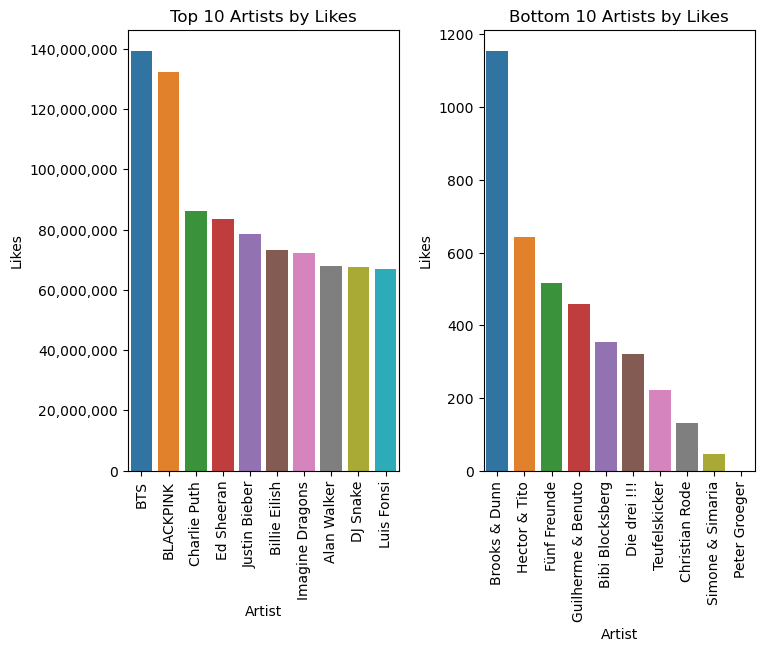

In [20]:
# create visuals for top 10 and bottom 10 artists by like
# may create individually (easier) or as subplots (harder)

# set subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5), sharex = False)
# adjust spacing between subplots (if vertical, would use h_pad)
f.tight_layout(w_pad = 3)

# create barplots
sns.barplot(data = df_drop.head(10), x = 'Artist', y = 'Likes', ax = ax1)
sns.barplot(data = df_drop.tail(10), x = 'Artist', y = 'Likes', ax = ax2)

# rotate x-axis tick marks for better visibility
# we cannot use plt.xticks (rotation = []) because of how we have these set up
# were you to show each figure in a different cell, you could use plt.xticks
ax1.tick_params(axis = 'x', labelrotation = 90)
ax2.tick_params(axis = 'x', labelrotation = 90)

# remove notation of 'le8' for numbers on top 10 and instead show full number with comma separator
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# set titles for each visual
ax1.set_title('Top 10 Artists by Likes')
ax2.set_title('Bottom 10 Artists by Likes')


plt.show()

##### 2. Find the 10 longest songs and 10 shortest songs (use the Duration_ms column)
Keep in mind the Duration_ms column has null values.

In [9]:
# how many null values do you need to handle?
# how does this influence how you'll proceed?

print('Duration_ms column NaN/nulls: ', df['Duration_ms'].isna().sum())
print('Total df records: ', len(df.index))
print('Percent NaN/Null: ', round((df['Duration_ms'].isna().sum()/len(df.index))*100, 2), '%')

Duration_ms column NaN/nulls:  2
Total df records:  20718
Percent NaN/Null:  0.01 %


In [10]:
# handle nulls
# you can choose to create a df copy or to edit the df directly
# if you want to play with different ways of handling nulls, create a copy

# average
df_avg = df.copy() # not needed since this was created earlier (see cell 6), but if you didn't use this method earlier, you'll need this line now
df_avg['Likes'].fillna((df_avg['Likes'].mean()), inplace=True)
print('\nFILLNA AVERAGE')
print('Likes column NaN/Nulls after fillna average: ', df_avg['Likes'].isna().sum())
print('Total df records original: ', len(df.index))
print('Total df records after fillna average: ', len(df_avg.index))



FILLNA AVERAGE
Likes column NaN/Nulls after fillna average:  0
Total df records original:  20718
Total df records after fillna average:  20718


##### 3. Find the top 10 songs by play count (add the Views + Stream columns together)
Both of these columns have null values.

In [11]:
# how many null values do you need to handle?
# how does this influence how you'll proceed?

print('Views column NaN/nulls: ', df['Views'].isna().sum())
print('Streams column NaN/nulls: ', df['Stream'].isna().sum())
print('Total df records: ', len(df.index))
print('Percent NaN/Null: ', round((df['Views'].isna().sum()/len(df.index))*100, 2), '%')
print('Percent NaN/Null: ', round((df['Stream'].isna().sum()/len(df.index))*100, 2), '%')

Views column NaN/nulls:  470
Streams column NaN/nulls:  576
Total df records:  20718
Percent NaN/Null:  2.27 %
Percent NaN/Null:  2.78 %


In [12]:
# handle nulls
# you can choose to create a df copy or to edit the df directly
# if you want to play with different ways of handling nulls, create a copy

# drop

# average

# median

# mode

##### Top 10 artists by play count (add the Views + Stream columns together, then sum that result and group by Artist)
Views and Streams both have null values.